In [13]:
# Exploring the dataset 
import pandas as pd 
df = pd.read_csv('euro_data_raw.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6655 entries, 0 to 6654
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6655 non-null   object 
 1   [Australian dollar ]      6655 non-null   object 
 2   [Bulgarian lev ]          6253 non-null   object 
 3   [Brazilian real ]         6387 non-null   object 
 4   [Canadian dollar ]        6655 non-null   object 
 5   [Swiss franc ]            6655 non-null   object 
 6   [Chinese yuan renminbi ]  6387 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6655 non-null   object 
 9   [Danish krone ]           6655 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6655 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6655 non-null   object 
 14  [Croatia

In [29]:
# Cleaning the data and and sorting the data 

df.rename(columns={'[Polish zloty ]': 'Zloty',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
df['Time'] = pd.to_datetime(df['Time'])
df.sort_values('Time', inplace=True)
df.reset_index(drop=True, inplace=True)

euro_to_zloty = df[['Time', 'Zloty']].copy()
euro_to_zloty['Zloty'].value_counts()

Zloty
-         62
4.2968     8
4.2953     7
4.1765     6
4.2788     6
          ..
3.6309     1
3.6246     1
3.6381     1
3.6453     1
4.271      1
Name: count, Length: 4733, dtype: int64

In [33]:
euro_to_zloty = euro_to_zloty[euro_to_zloty['Zloty'] != '-']
euro_to_zloty['Zloty'] = euro_to_zloty['Zloty'].astype(float)
euro_to_zloty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6593 entries, 0 to 6654
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    6593 non-null   datetime64[ns]
 1   Zloty   6593 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 154.5 KB


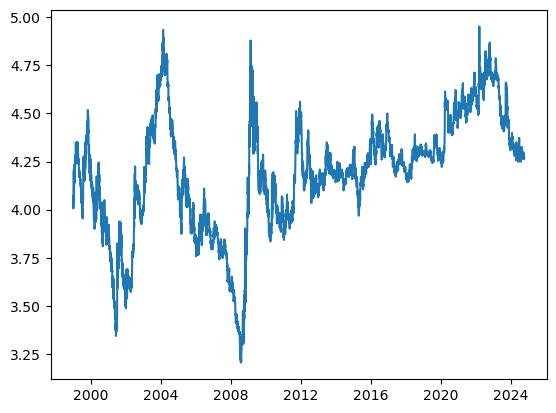

In [39]:
# Plotting the trend line chart 

import matplotlib.pyplot as plt

plt.plot(euro_to_zloty['Time'], euro_to_zloty['Zloty'])
plt.show()

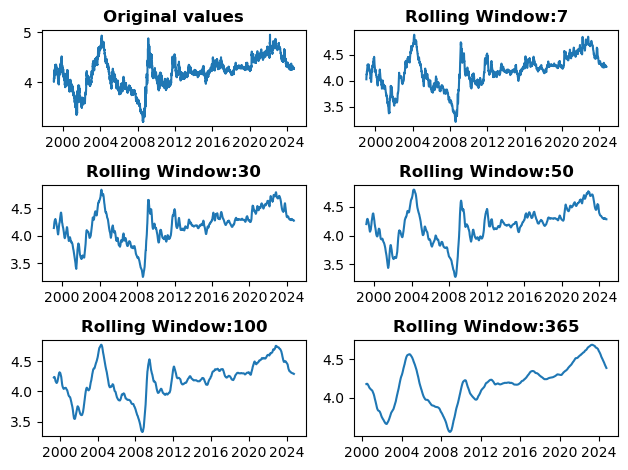

In [43]:
# Rolling window analysis 
plt.figure(figsize=(9,6))
plt.subplot(3,2,1)
plt.plot(euro_to_zloty['Time'], euro_to_zloty['Zloty'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_zloty['Time'],
             euro_to_zloty['Zloty'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() 
plt.show()

In [55]:
euro_to_zloty['rolling_mean'] = euro_to_zloty['Zloty'].rolling(30).mean()
euro_to_zloty

,Time,Zloty,rolling_mean
0,1999-01-04,4.0712,NaN
1,1999-01-05,4.0245,NaN
2,1999-01-06,4.0065,NaN
3,1999-01-07,4.0165,NaN
4,1999-01-08,4.0363,NaN
...,...,...,...
6650,2024-09-23,4.2750,4.279507
6651,2024-09-24,4.2665,4.278757
6652,2024-09-25,4.2643,4.277650
6653,2024-09-26,4.2710,4.277300


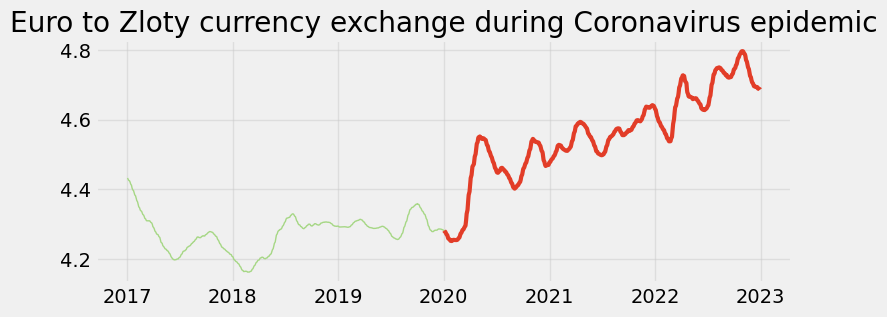

In [135]:
# Plotting the graph 
corona_epidemic = euro_to_zloty.copy(
                   )[(euro_to_zloty['Time'].dt.year >= 2017
                   ) & (euro_to_zloty['Time'].dt.year <= 2021)]
corona_epidemic_h = euro_to_zloty.copy(
                   )[(euro_to_zloty.Time.dt.year >= 2020
                   ) & (euro_to_zloty.Time.dt.year <= 2022)]
import matplotlib.style as style
style.use('fivethirtyeight')

fig,ax = plt.subplots(figsize=(8,3))
ax.plot(corona_epidemic['Time'],
        corona_epidemic['rolling_mean'],
        linewidth=1, color='#A6D785')

### Highlighting the 2020-2021 period
ax.plot(corona_epidemic_h['Time'],
        corona_epidemic_h['rolling_mean'],
        linewidth=3, color='#e23d28')
plt.title('Euro to Zloty currency exchange during Coronavirus epidemic')
ax.grid(alpha=0.5)

plt.show()

# Value of euro jumped from 4.28 to 4.55 zlotys in the beginning of the epidemic (March 2020) and continued to grow into 2023.